**I'll explain the steps involved in component analysis and use heart disease data set to achieve this.**

# 1)I'll first import all the necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2)Loading the dataset
To import the dataset we will use Pandas library.It is the best Python library to play with the dataset and has a lot of functionalities. 

In [3]:
df = pd.read_csv('heart_disease.csv')

In [4]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Risk_Level', 'last_evaluation', 'tumor_size', 'irradiat', 'tiinv-nodes', 'deg-malig', 'left', 'node-caps', 'breast-quad', 'state']


df.columns.tolist() fetches all the columns and then convert it into list type.This step is just to check out all the column names in our data.Columns are also called as features of our datasets.

In [5]:
df.head()

,Risk_Level,last_evaluation,tumor_size,irradiat,tiinv-nodes,deg-malig,left,node-caps,breast-quad,state
0,0.38,0.53,2,157,3,0,1,0,left_up,low
1,0.80,0.86,5,262,6,0,1,0,central,medium
2,0.11,0.88,7,272,4,0,1,0,left_low,medium
3,0.72,0.87,5,223,5,0,1,0,left_low,low
4,0.37,0.52,2,159,3,0,1,0,right_up,low


df.head() displays first five rows of our datasets.

In [5]:
df.corr()

,Risk_Level,last_evaluation,tumor_size,irradiat,tiinv-nodes,deg-malig,left,node-caps
Risk_Level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
tumor_size,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
irradiat,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
tiinv-nodes,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
deg-malig,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
node-caps,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


**df.corr()** compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.

**Visualising correlation using Seaborn library**

Text(0.5, 1.0, 'Correlation between different fearures')

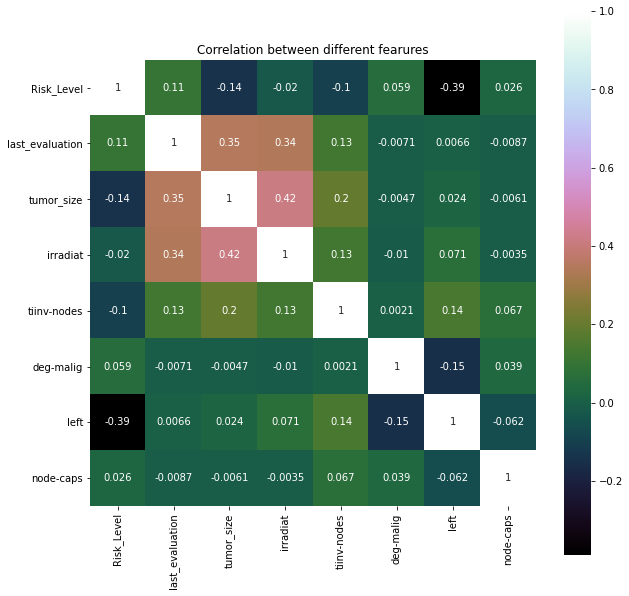

In [6]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

**Doing some visualisation before moving onto PCA**

In [7]:
df['breast-quad'].unique()

array(['left_up', 'central', 'left_low', 'right_up', 'right_low', nan,
       'left_top', 'right_top'], dtype=object)

Here we are printing all the unique values in **breast-quad** columns

In [7]:
sales=df.groupby('breast-quad').sum()
sales

,Risk_Level,last_evaluation,tumor_size,irradiat,tiinv-nodes,deg-malig,left,node-caps
breast-quad,,,,,,,,
central,1045.68,1211.90,6314,339262,5821,255,425,40
left_low,1009.18,1178.24,6273,330468,5693,238,348,43
left_top,5106.72,5929.22,31572,1666622,29124,1194,1837,144
left_up,1176.32,1374.37,7316,381626,6711,299,406,51
right_low,226.80,255.78,1350,73401,1207,51,75,10
right_top,147.17,241.26,1293,69404,1296,18,321,0
right_up,470.47,538.67,2859,151317,2567,112,156,31


In [8]:
df['breast-quad'].unique()

array(['left_up', 'central', 'left_low', 'right_up', 'right_low', nan,
       'left_top', 'right_top'], dtype=object)

In [10]:
groupby_breast_quad=df.groupby('breast-quad').mean()
groupby_breast_quad

,Risk_Level,last_evaluation,tumor_size,irradiat,tiinv-nodes,deg-malig,left,node-caps
breast-quad,,,,,,,,
central,0.623914,0.723091,3.767303,202.423628,3.473150,0.152148,0.253580,0.023866
left_low,0.611624,0.714085,3.801818,200.283636,3.450303,0.144242,0.210909,0.026061
left_top,0.616084,0.715312,3.808903,201.064302,3.513572,0.144046,0.221619,0.017372
left_up,0.612667,0.715818,3.810417,198.763542,3.495312,0.155729,0.211458,0.026562
right_low,0.630000,0.710500,3.750000,203.891667,3.352778,0.141667,0.208333,0.027778
right_top,0.434130,0.711681,3.814159,204.731563,3.823009,0.053097,0.946903,0.000000
right_up,0.627293,0.718227,3.812000,201.756000,3.422667,0.149333,0.208000,0.041333


In [11]:
central=groupby_breast_quad['Risk_Level'].central
left_low=groupby_breast_quad['Risk_Level'].left_low
left_top=groupby_breast_quad['Risk_Level'].left_top
left_up=groupby_breast_quad['Risk_Level'].left_up
right_low=groupby_breast_quad['Risk_Level'].right_low
right_up=groupby_breast_quad['Risk_Level'].right_up
right_top=groupby_breast_quad['Risk_Level'].right_top
right_top

0.43412979351032494

Text(0.5, 1.0, 'Mean Probability Of Each Quad')

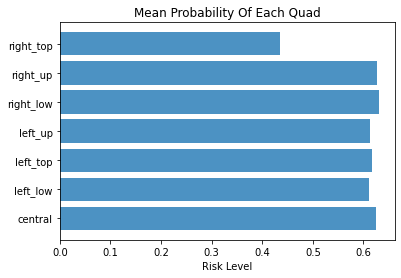

In [12]:

quad_name=('central', 'left_low', 'left_top', 'left_up', 'right_low', 'right_up','right_top')
quad=(central, left_low, left_top, left_up, right_low, right_up, right_top)
y_pos = np.arange(len(quad))
x=np.arange(0,1,0.1)

plt.barh(y_pos, quad, align='center', alpha=0.8)
plt.yticks(y_pos,quad_name )
plt.xlabel('Risk Level')
plt.title('Mean Probability Of Each Quad')

# Principal Component Analysis

In [13]:
df.head()

,Risk_Level,last_evaluation,tumor_size,irradiat,tiinv-nodes,deg-malig,left,node-caps,breast-quad,state
0,0.38,0.53,2,157,3,0,1,0,left_up,low
1,0.80,0.86,5,262,6,0,1,0,central,medium
2,0.11,0.88,7,272,4,0,1,0,left_low,medium
3,0.72,0.87,5,223,5,0,1,0,left_low,low
4,0.37,0.52,2,159,3,0,1,0,right_up,low


In [14]:
df_drop=df.drop(labels=['breast-quad','state'],axis=1)
df_drop.head()

,Risk_Level,last_evaluation,tumor_size,irradiat,tiinv-nodes,deg-malig,left,node-caps
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


**df.drop()**  is the method to drop the columns in our dataframe

Now we need to bring "left" column to the front as it is the label and not the feature.

In [15]:
cols = df_drop.columns.tolist()
cols

['Risk_Level',
 'last_evaluation',
 'tumor_size',
 'irradiat',
 'tiinv-nodes',
 'deg-malig',
 'left',
 'node-caps']

Here we are converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use cols.insert method

In [37]:
cols.insert(0, cols.pop(cols.index('left')))

In [17]:
cols

['Risk_Level',
 'last_evaluation',
 'tumor_size',
 'irradiat',
 'tiinv-nodes',
 'deg-malig',
 'left',
 'node-caps']

In [18]:
df_drop = df_drop.reindex(columns= cols)

By using df_drop.reindex(columns= cols) we are converting list to columns again

Now we are separating features of our dataframe from the labels.

In [19]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[  0.53,   2.  , 157.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.86,   5.  , 262.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.88,   7.  , 272.  , ...,   0.  ,   1.  ,   0.  ],
       ...,
       [  0.53,   2.  , 143.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.96,   6.  , 280.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.52,   2.  , 158.  , ...,   0.  ,   1.  ,   0.  ]])

In [20]:
y

array([0.38, 0.8 , 0.11, ..., 0.37, 0.11, 0.37])

In [21]:
np.shape(X)

(14999, 7)

Thus X is now matrix with 14999 rows and 7 columns

In [22]:
np.shape(y)

(14999,)

y is now matrix with 14999 rows and 1 column

# 4) Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data 

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# 5) Computing Eigenvectors and Eigenvalues:
Before computing Eigen vectors and values we need to calculate covariance matrix.

## Covariance matrix

In [26]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476  0.00656756
  -0.00868435]
 [ 0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086  0.02378877
  -0.00606436]
 [ 0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356  0.07129193
  -0.00354465]
 [ 0.1315995   0.19679901  0.12776343  1.00006668  0.00212056  0.14483183
   0.06743742]
 [-0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668 -0.15463194
   0.03924805]
 [ 0.00656756  0.02378877  0.07129193  0.14483183 -0.15463194  1.00006668
  -0.06179223]
 [-0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805 -0.06179223
   1.00006668]]


In [27]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476  0.00656756
  -0.00868435]
 [ 0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086  0.02378877
  -0.00606436]
 [ 0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356  0.07129193
  -0.00354465]
 [ 0.1315995   0.19679901  0.12776343  1.00006668  0.00212056  0.14483183
   0.06743742]
 [-0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668 -0.15463194
   0.03924805]
 [ 0.00656756  0.02378877  0.07129193  0.14483183 -0.15463194  1.00006668
  -0.06179223]
 [-0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805 -0.06179223
   1.00006668]]


Equivalently we could have used Numpy np.cov to calculate covariance matrix

Text(0.5, 1.0, 'Correlation between different features')

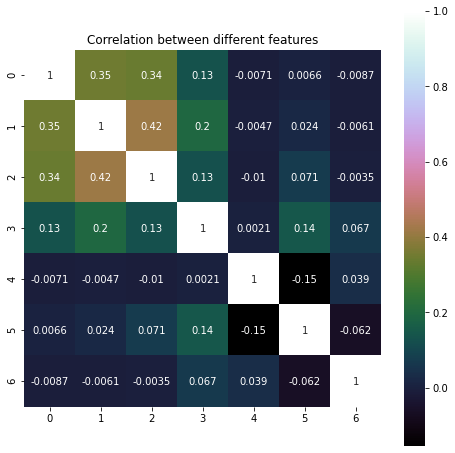

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

# Eigen decomposition of the covariance matrix

In [29]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.50989801  0.13620434 -0.16228589 -0.00841522 -0.82288203  0.12840433
  -0.03771418]
 [ 0.565052    0.1067006  -0.08107955  0.71472262  0.38457839  0.03671742
  -0.05177067]
 [ 0.54862799  0.06563536 -0.140058   -0.6509886   0.38702913  0.10110378
   0.30213143]
 [ 0.31908163 -0.17222592  0.56958992 -0.19090421  0.01809938 -0.42820641
  -0.56917461]
 [-0.03698939  0.61544776  0.09242764  0.04419494 -0.06310716 -0.67915111
   0.37964593]
 [ 0.12860254 -0.69063536  0.19417634  0.15543461 -0.14053295 -0.24578919
   0.60370355]
 [ 0.00277133  0.2834439   0.75946899  0.05250788 -0.03336856  0.51664581
   0.2684498 ]]

Eigenvalues 
[1.83725929 1.18759578 1.04277835 0.56779059 0.67432069 0.91869413
 0.7720279 ]


In [30]:
# 6) Selecting Principal Components¶

# 6) Selecting Principal Components

T
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8372592941709194
1.187595776493443
1.04277834834622
0.9186941275206653
0.7720279029653646
0.674320689765052
0.5677905896355226


**Explained Variance**
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [32]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

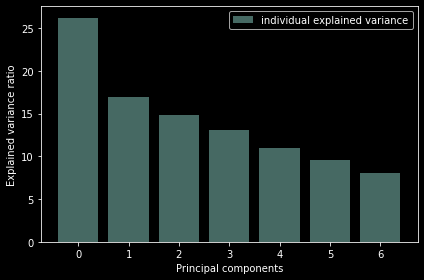

In [33]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th and 7th components share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored since they both contribute almost 17% of the data.But we can drop the last component as it has less than 10% of the variance

**Projection Matrix**

The construction of the projection matrix that will be used to transform the Risk Level analytics data onto the new feature subspace. Suppose only 1st and 2nd principal component shares the maximum amount of information say around 90%.Hence we can drop other components. Here, we are reducing the 7-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [34]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.50989801  0.13620434]
 [ 0.565052    0.1067006 ]
 [ 0.54862799  0.06563536]
 [ 0.31908163 -0.17222592]
 [-0.03698939  0.61544776]
 [ 0.12860254 -0.69063536]
 [ 0.00277133  0.2834439 ]]


**Projection Onto the New Feature Space**
In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
**Y=X×W**

In [35]:
Y = X_std.dot(matrix_w)
Y

array([[-1.72892725, -1.83362652],
       [ 2.43854766, -1.52719204],
       [ 3.08779222, -1.08908489],
       ...,
       [-1.88272323, -1.85202597],
       [ 2.9555557 , -1.10147932],
       [-1.74773196, -1.84026983]])

# PCA in scikit-learn

Text(0, 0.5, 'Cumulative explained variance')

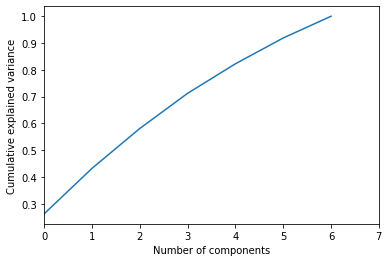

In [36]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 6 components. Therfore we can drop 7th component.

In [37]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [38]:
print(Y_sklearn)

[[-1.72892725 -1.83362652  0.42163795 -0.37299469  0.92877514 -0.23597282]
 [ 2.43854766 -1.52719204  0.78726134 -0.7033206   0.19580763 -0.03551767]
 [ 3.08779222 -1.08908489 -0.17152294 -0.02194392  0.94753677  0.54507146]
 ...
 [-1.88272323 -1.85202597  0.46090017 -0.40133695  0.84407913 -0.34446806]
 [ 2.9555557  -1.10147932 -0.20402736  0.02447674  1.02031012 -0.08955597]
 [-1.74773196 -1.84026983  0.42831484 -0.3784721   0.93702826 -0.18014734]]


In [39]:
Y_sklearn.shape

(14999, 6)

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.